In [1]:
import pdfplumber

In [10]:
with pdfplumber.open('Modalmais.pdf') as pdf:
    page = pdf.pages[2]
    all_text  = ''
    texto = page.extract_text()
    for row in texto:
        all_text += texto
    row = all_text.split('\n')
    titulos = row[2].split()
    obj_titulos = {
        "Nr_Nota": titulos[0],
        "Folha": titulos[1],
        "Data_pregao": titulos[2]
    }
    print(obj_titulos)

{'Nr_Nota': '490254', 'Folha': '1', 'Data_pregao': '11/01/2019'}


In [23]:
        info_banco_1 = row[4].split()
        info_banco_2 = row[5].split()
        endereco = ''
        total = 0
        while total <= len(info_banco_2) - 4:
            endereco += f" {info_banco_2[total]}"
            total += 1
        info_banco_3 = row[6].split()
        info_banco_4 = row[7].split()

        obj_titulos2 = {
            "Corretora": f"{info_banco_1[0]} {info_banco_1[1]} {info_banco_1[2]}",
            "Telefone_corretora": f"{info_banco_1[-3]} {info_banco_1[-2]}",
            "CNPJ": info_banco_1[-1],
            "Endereco_corretora": endereco,
            "Internet": info_banco_3[1],
            "Email": info_banco_3[3],
            "Numero_da_corretora": info_banco_3[4],
            "Telefone_Ouvidoria": info_banco_4[2],
            "Email_Ouvidoria": info_banco_4[5]
        }
        print(obj_titulos2)

{'Corretora': 'MODAL DTVM LTDA', 'Telefone_corretora': '(21) 3223-7700', 'CNPJ': '05.389.174/0001-01', 'Endereco_corretora': ' PRAIA DE BOTAFOGO, 501 6º ANDAR BOTAFOGO 22250-040 RIO DE JANEIRO RJ', 'Internet': 'http://www.modalmais.com.br', 'Email': 'atendimento@modalmais.com.br', 'Numero_da_corretora': '1982-8', 'Telefone_Ouvidoria': '0800-283-0077', 'Email_Ouvidoria': 'ouvidoria@modalmais.com.br'}


{'Cliente': 'ALINE GARCIA DE MATOS', 'Endereco_cliente': 'RUA QUINZE DE NOVEMBRO, 209 - 24020-125 CENTRO NITEROI - RJ', 'CNPJ_ou_CPF': '34826838832', 'Codigo_do_cliente': '49516'}


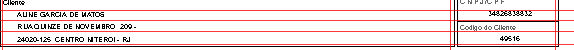

In [61]:
with pdfplumber.open('Modalmais.pdf') as pdf:
    page = pdf.pages[0]
    coluna_cliente = page.crop((20, 150, page.width, 200))
    cliente_settings = {
        "vertical_strategy": "lines",
        "horizontal_strategy": "explicit",
        "explicit_horizontal_lines": [160, 170, 181, 194],
        "explicit_vertical_lines": [22, 470, 575]
    }
    cliente_dados = coluna_cliente.extract_table(cliente_settings)
    obj_cliente = {
        "Cliente": cliente_dados[0][0],
        "Endereco_cliente": f"{cliente_dados[1][0]} {cliente_dados[2][0]}",
        "CNPJ_ou_CPF": cliente_dados[0][2],
        "Codigo_do_cliente": cliente_dados[2][2]
    }
im = coluna_cliente.to_image()
im.draw_vlines([22, 470, 575])
im.draw_hlines([160, 170, 181, 194])

In [7]:
with pdfplumber.open('Modalmais.pdf') as pdf:
    page = pdf.pages[0]
    coluna_negocios = page.crop((20, 215, page.width, 530))
    negocios_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "text",
        "explicit_vertical_lines": [25, 35, 100, 175, 230, 290, 380, 480, 500, 580]
    }
    negocios = coluna_negocios.extract_table(negocios_settings)
    i = 0
    teste = {}
    while i <= len(negocios) - 1:
        obj_negocio = {
                "C_V": negocios[i][0],
                "Mercadoria": negocios[i][1],
                "Vencimento": negocios[i][2],
                "Quantidade": negocios[i][3],
                "Preco_Ajuste": negocios[i][4],
                "Tipo_do_negocio": negocios[i][5],
                "Vlr_de_Operacao_Ajuste": negocios[i][6],
                "D_C": negocios[i][7],
                "Taxa_Operacional": negocios[i][8],
            }
        teste[f"obj_negocio_{i}"] = obj_negocio
        i += 1
    print(teste)
#im = coluna_negocios.to_image()
#im.draw_vlines([25, 35, 100, 175, 230, 290, 380, 480, 500, 580])

{'obj_negocio_0': {'C_V': 'C', 'Mercadoria': 'WDO G19', 'Vencimento': '01/02/2019', 'Quantidade': '1,00', 'Preco_Ajuste': '3.712,50', 'Tipo_do_negocio': 'DAY TRADE', 'Vlr_de_Operacao_Ajuste': '171,28', 'D_C': 'D', 'Taxa_Operacional': '0,05'}, 'obj_negocio_1': {'C_V': 'V', 'Mercadoria': 'WDO G19', 'Vencimento': '01/02/2019', 'Quantidade': '1,00', 'Preco_Ajuste': '3.713,00', 'Tipo_do_negocio': 'DAY TRADE', 'Vlr_de_Operacao_Ajuste': '176,28', 'D_C': 'C', 'Taxa_Operacional': '0,05'}, 'obj_negocio_2': {'C_V': 'V', 'Mercadoria': 'WDO G19', 'Vencimento': '01/02/2019', 'Quantidade': '1,00', 'Preco_Ajuste': '3.689,00', 'Tipo_do_negocio': 'DAY TRADE', 'Vlr_de_Operacao_Ajuste': '63,72', 'D_C': 'D', 'Taxa_Operacional': '0,05'}, 'obj_negocio_3': {'C_V': 'C', 'Mercadoria': 'WDO G19', 'Vencimento': '01/02/2019', 'Quantidade': '1,00', 'Preco_Ajuste': '3.694,00', 'Tipo_do_negocio': 'DAY TRADE', 'Vlr_de_Operacao_Ajuste': '13,72', 'D_C': 'C', 'Taxa_Operacional': '0,05'}}


{'Vendas_disponivel': '0,00', 'Compra_disponivel': '0,00', 'Venda_opcoes': '0,00', 'Compra_opcoes': '0,00', 'Valor_dos_negocios': '45,00 | D', 'IRRF': '0,00', 'IRRF_day_trade': '0,00', 'Taxa_operacional': '0,20', 'Taxa_registro_BMF': '1,00', 'Taxa_BMF': '0,92', 'Outros_Custos': '0,00', 'ISS': '0,00', 'Ajuste_de_posicao': '0,00 | -', 'Ajuste_Day_Trade': '45,00 | D', 'Total_das_despesas': '2,12 | C', 'Outros': '0,00', 'IRRF_Corretagem': '0,00', 'Total_Conta_Investimento': '0,00 | C', 'Total_Conta_Normal': '47,12 | D', 'Total_liquido': '0,00 | C', 'Total_liquido_da_nota': '47,12 | D'}


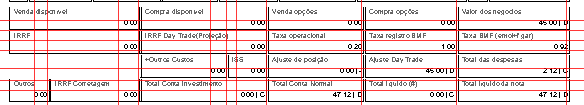

In [246]:
with pdfplumber.open('Modalmais.pdf') as pdf:
    page = pdf.pages[0]
    coluna_inferior = page.crop((10, 540, page.width, 645))
    table_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "text",
        "explicit_vertical_lines": [44, 57, 128, 148, 220, 
                236, 246, 276, 371, 466, 576],
        "explicit_horizontal_lines": [560, 570, 580, 590, 608, 620, 630]
    }
    resumo = coluna_inferior.extract_table(table_settings)
    obj_resumo = {
        "Vendas_disponivel": resumo[2][2],
        "Compra_disponivel": resumo[2][6],
        "Venda_opcoes": resumo[2][7],
        "Compra_opcoes": resumo[2][8],
        "Valor_dos_negocios": resumo[2][9],
        "IRRF": resumo[6][2],
        "IRRF_day_trade": resumo[6][6],
        "Taxa_operacional": resumo[6][7],
        "Taxa_registro_BMF": resumo[6][8],
        "Taxa_BMF": resumo[6][9],
        "Outros_Custos": resumo[10][4],
        "ISS": resumo[10][6],
        "Ajuste_de_posicao": resumo[10][7],
        "Ajuste_Day_Trade": resumo[10][8],
        "Total_das_despesas": resumo[10][9],
        "Outros": resumo[13][0],
        "IRRF_Corretagem": resumo[13][2],
        "Total_Conta_Investimento": resumo[13][6],
        "Total_Conta_Normal": resumo[13][7],
        "Total_liquido": resumo[13][8],
        "Total_liquido_da_nota": resumo[13][9],
    }
    print(obj_resumo)
im = coluna_inferior.to_image()
im.draw_vlines([44, 57, 128, 148, 220, 
                236, 246, 276, 371, 466, 576])
im.draw_hlines([560, 570, 580, 590, 608, 620, 630])

In [ ]:
dict = {
    "carro": "vermelho",
    "modelo": "chevet"
}

dict_1 = {
    "ano": 2019,
    "dados_do_carro": dict
}
print(dict_1)